In [26]:
import cv2
from cnocr import CnOcr as cr

ocr = cr()
nocr = cr(det_model_name='en_number_mobile_v2.0', cand_alphabet="0123456789")
#nocr = cr(cand_alphabet="0123456789")

In [30]:
WHITE, BLACK = 1, 2
black_stone_threshold = 128
image = cv2.imread('1.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def displayocr(out):
    for item in out:
        #posit = item['position']
        #lefttop = np.min(posit, axis=0)
        #rightbottom = np.max(posit, axis=0)
        #print('{} at [{}, {}]'.format(item['text'], lefttop, rightbottom))
        #use model 'en_number_mobile_v2.0' without position information
        print('{} with score {}]'.format(item['text'], item['score']))

def ocr_2(stone_image):
    result = numocr.image_to_string(stone_image, config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789').strip()
    if result.isdigit():
      step_num = eval(result)
      return (step_num, True)
    return (0, False)

def ocr_1(stone_image):
    out = ocr.ocr(stone_image)
    if len(out) > 0:
      result = out[0]['text'].strip()
      if result.isdigit():
        step_num = eval(result)
        return (step_num, True)

    return (0, False)

def norm_step_img(img):
    status = WHITE
    brightness = np.mean(img)
    if brightness <= black_stone_threshold:
        img = 255 - img
        status = BLACK
    # maybe there is error the stones at edge of board
    center = np.array(img.shape) // 2
    radius = np.min(center) - 2
    mask = np.ones(img.shape,dtype=np.uint8)
    mask = cv2.circle(mask, center, radius, (0,0,0), -1)
    cv2.add(img, 255*mask, img, mask = mask)
    return (img, brightness, status)

In [3]:
import numpy as np
out = ocr.ocr(np.array(image_gray))
displayocr(out)

52 at [[        394          92], [        431         125]]
H9 at [[        345         159], [        366         181]]
4 at [[        400         159], [        423         178]]
 at [[        281         223], [        297         236]]
5C at [[        334         220], [        364         241]]
 at [[       1024         469], [       1044         487]]
22 at [[        144         520], [        184         564]]
xO at [[        144         703], [        188         747]]
63 at [[       1014         711], [       1055         744]]
61 at [[       1017         773], [       1047         803]]
长 at [[        906         847], [        920         859]]
26 at [[        958         844], [        986         862]]
O5 at [[       1081         847], [       1102         861]]
59 at [[       1014         898], [       1055         934]]
66 at [[       1075         897], [       1112         931]]
6( at [[       1080         964], [       1103         986]]
39 at [[       1022        102

In [4]:
out = nocr.ocr(np.array(image_gray))
displayocr(out)

52 at [[        394          92], [        431         125]]
19 at [[        345         159], [        366         181]]
4 at [[        400         159], [        423         178]]
 at [[        281         223], [        297         236]]
50 at [[        334         220], [        364         241]]
 at [[       1024         469], [       1044         487]]
22 at [[        144         520], [        184         564]]
 at [[        144         703], [        188         747]]
63 at [[       1014         711], [       1055         744]]
61 at [[       1017         773], [       1047         803]]
 at [[        906         847], [        920         859]]
26 at [[        958         844], [        986         862]]
05 at [[       1081         847], [       1102         861]]
59 at [[       1014         898], [       1055         934]]
66 at [[       1075         897], [       1112         931]]
6 at [[       1080         964], [       1103         986]]
39 at [[       1022        1025], 

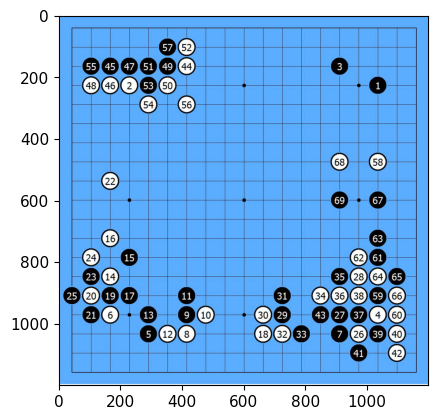

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(image)

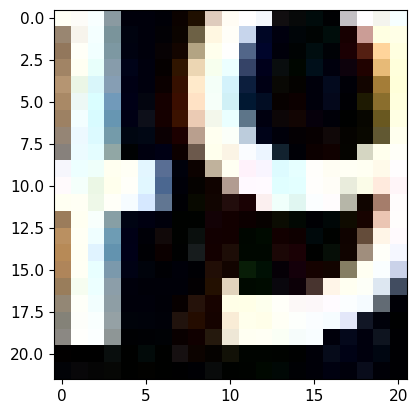

In [6]:
plt.imshow(image[159:181, 345:366])
plt.show()

49 at [[          3           4], [         41          36]]
8 at [[         15          12], [         34          39]]


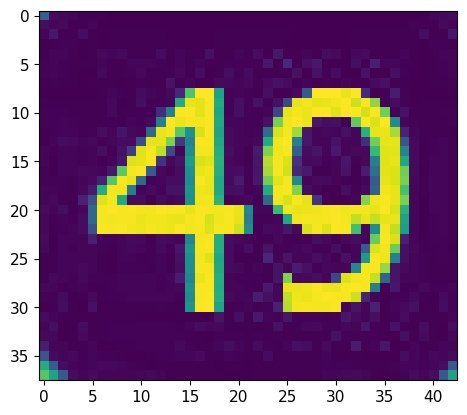

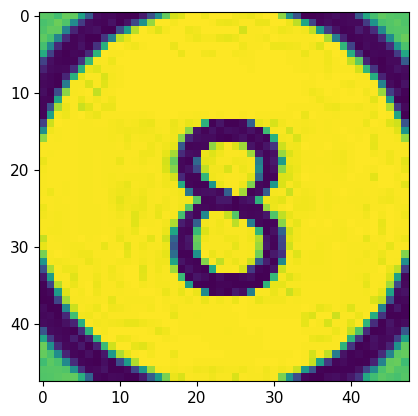

In [7]:
img49 = image_gray[148:186, 330:373]
plt.figure()
plt.imshow(img49)
out = ocr.ocr(np.array(img49))
displayocr(out)
img8 = image_gray[1010:1058, 390:438]
plt.figure()
plt.imshow(img8)
out = ocr.ocr(np.array(img8))
displayocr(out)

8 at [[         15          12], [         34          38]]
49 at [[          1           3], [         42          37]]


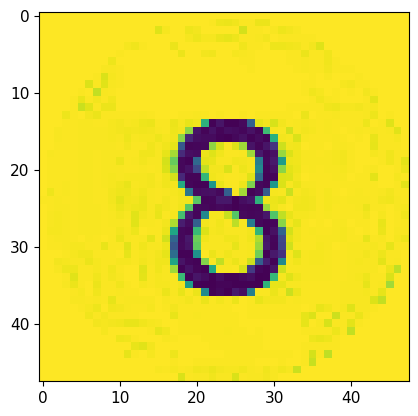

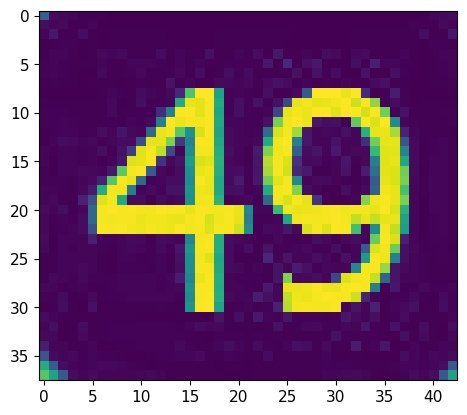

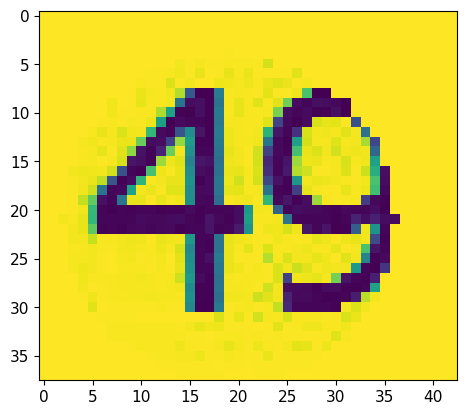

In [8]:
is_black = np.mean(img8) <= 128
mask = np.ones(img8.shape,dtype=np.uint8)
center = np.array(img8.shape) // 2
radius = np.min(center)
mask = cv2.circle(mask, center, radius, (0,0,0), -1)
cv2.add(img8, 255*mask, img8, mask = mask)
plt.imshow(img8)

plt.figure()
plt.imshow(img49)
nimg49,_,_=norm_step_img(img49)
plt.figure()
plt.imshow(nimg49)

out = nocr.ocr(np.array(img8))
displayocr(out)

out = nocr.ocr(np.array(nimg49))
displayocr(out)


In [9]:
import pytesseract

result = pytesseract.image_to_string(img49, config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789')
print(result)

49



test code for 2.png with step 1, 2, 3, 4

sometimes 1->4/41 for [179:283, 270:294], ok for [172:212,262:299]

result: 1, 2, 3, 


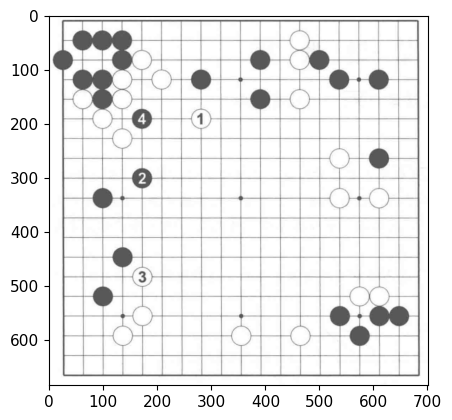

In [10]:
import pytesseract

image = cv2.imread('2.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)

one_image = image_gray[172:212, 262:299]
two_image = image_gray[283:321, 152:192]
three_image = image_gray[472:496, 165:183]
o_image = image_gray[142:170, 123:151]
result_1 = pytesseract.image_to_string(one_image, config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789')
result_2 = pytesseract.image_to_string(two_image, config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789')
result_3 = pytesseract.image_to_string(three_image, config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789')
result_o = pytesseract.image_to_string(o_image, config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789')
print('result: {}, {}, {}, {}'.format(result_1.strip(), result_2.strip(), result_3.strip(), result_o.strip()))

8->3 [6,16] [1005:1063, 385:443]
detect error!. sometimes 1->41? 


[{'text': '1', 'score': 0.7604074478149414}]
4



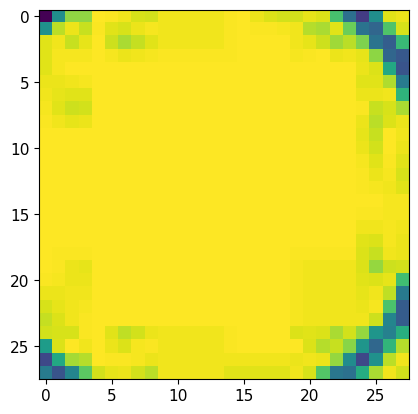

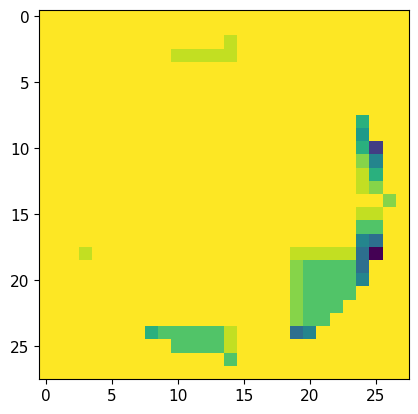

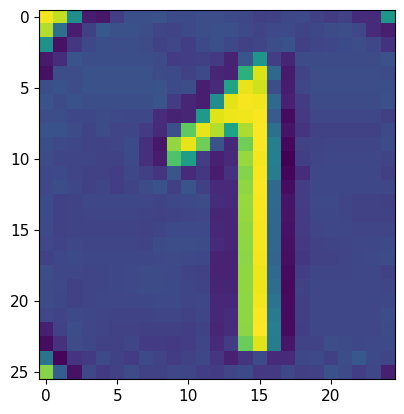

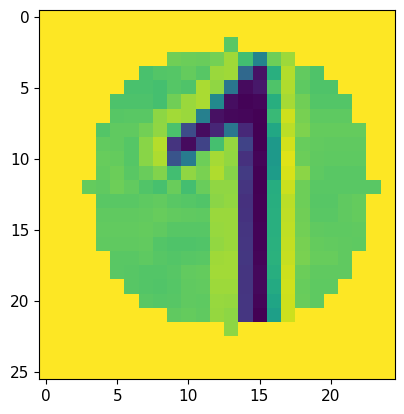

In [28]:
plt.imshow(o_image)
on_image,_,_ = norm_step_img(o_image.copy())
plt.figure()
plt.imshow(on_image)
out = nocr.ocr(on_image)
displayocr(out)
result_o = pytesseract.image_to_string(on_image, config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789')
print(result_o)

out = nocr.ocr(one_image)
plt.figure()
plt.imshow(one_image)
new_one, _, _ = norm_step_img(one_image)
plt.figure()
plt.imshow(new_one)
out = nocr.ocr(new_one)
displayocr(out)

result_1 = pytesseract.image_to_string(new_one, config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789')
print(result_1)

1 with score 0.7385955452919006]
4



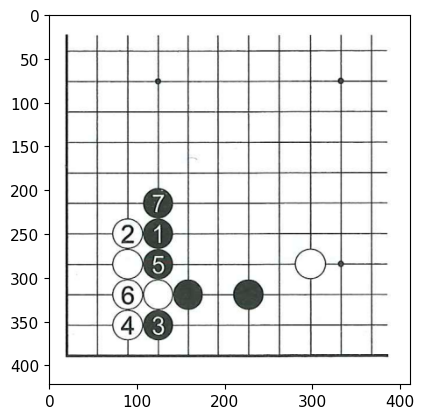

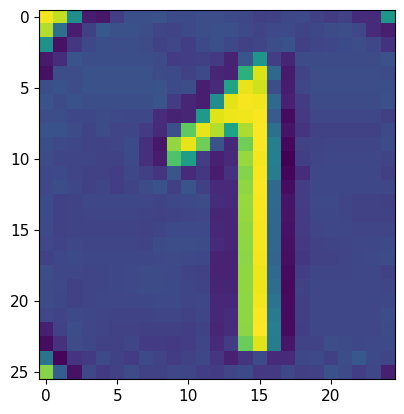

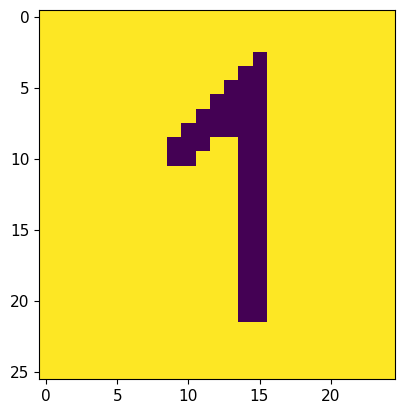

In [32]:
image = cv2.imread('3.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)

one_image = image_gray[237:263, 111:136]
plt.figure()
plt.imshow(one_image)
new_one, _, _ = norm_step_img(one_image)
#sharpen the image
ret, new_one = cv2.threshold(new_one, 127, 255, cv2.THRESH_BINARY)
plt.figure()
plt.imshow(new_one)
out = nocr.ocr(new_one)
displayocr(out)

#result_1 = pytesseract.image_to_string(new_one, config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789')
result_1 = pytesseract.image_to_string(new_one, lang="eng", config='--psm 7')
print(result_1)